## Primer entregable. Ampliación de Inteligencia Artificial - Curso 22-23

## Ejercicio scikit learn

###  Nombre: Lidia García Barragán

### Plazo de entrega: 17 de abril (0.75 puntos de la nota total)

### HONESTIDAD ACADÉMICA Y COPIAS: 

La realización de los ejercicios es un trabajo personal, por lo que deben completarse por cada estudiante de manera individual.  

Cualquier plagio o compartición de código que se detecte significará automáticamente la calificación de **CERO EN LA ASIGNATURA** para **TODOS** los alumnos involucrados. Por tanto a estos alumnos NO se les conservará, para futuras convocatorias, ninguna nota que hubiesen obtenido hasta el momento. Independientemente de **OTRAS ACCIONES DE CARÁCTER DISCIPLINARIO** que se pudieran tomar.

****

### IMPORTANTE: Comentar y explicar adecuadamente cada paso realizado.

#### En este ejercicio, <u>es muy importante el comentar adecuadamente cada paso</u> dado. Los comentarios, que han de ser originales, deberán explicar  todo lo realizado, de manera que se demuestre que se conocen y manejan adecuadamente los conceptos y las herramientas que se usan. Estas explicaciones y comentarios serán parte muy importante de la nota.

****

# ENUNCIADO

Se pide aplicar modelos de _**random forest**_ o de _**máquinas de vectores soporte**_ (SVM) a dos conjuntos de datos que ya hemos visto en clase. Estos datos son:
* Imágenes de dígitos manuscritos
* Críticas de películas en IMDB

**Con el estudio de estos dos conjuntos de datos, y con UNO de los modelos anteriores (random forest o SVM) en principio es posible obtener la máxima puntuación del ejercicio.**

Sin embargo, **opcionalmente** se pueden aplicar los dos modelos (random forest y SVM) y sustituir uno de los *datasets* por un tercer conjunto de datos de libre elección (aunque daremos un par de sugerencias más adelante). 

En general, estas son algunas de las técnicas que se podrían aplicar en el estudio de cada caso: 

* Exploración preliminar del conjunto de datos
* Visualización de algunas características 
* Uso de clasificadores (o de modelos de regresión), en su caso
* Separación de ejemplos para test
* Métricas
* Validación cruzada
* Ajuste de parámetros con `GridSearchCV`
* Mostrar la predicción sobre ejemplos individuales

Las clases de Scikit Learn que implementan los respectivos modelos son:

* `RandomForestClassifier`del módulo `ensemble`, para *random forests*. 
* `SVC`del módulo `svm`, para *máquinas de vectores soporte*

Ambos modelos están explicados en las diapositivas y en los correspondientes vídeos del tema de Complementos de Aprendizaje Automático

**Se pide explicar, usando los dos conjuntos de datos anteriores, uno de estos modelos, y los principales argumentos y parámetros de las correspondientes clases. Los comentarios deben reflejar que se ha comprendido el modelo, su aprendizaje y la manera en la que clasifica nuevas instancias.** 

*****

Pasamos ahora a describir los conjuntos de datos. Estos datos ya se han usado en alguna práctica de clase, pero volvemos a presentarlos. 

## 0. Explicaciones generales a usar en ambos modelos

### 0.1 Parámetros Random Forest
Los parametros que utilizaremos serán los siguientes:

* n_estimators: Este parámetro controla el número de árboles que se incluyen en el bosque. 
* max_depth: Este parámetro controla la profundidad máxima de cada árbol en el bosque.
* min_samples_split: Este parámetro controla el número mínimo de ejemplos (muestras) requeridos para dividir un nodo interno. Si una hoja tiene menos muestras que este valor, el nodo no se dividirá.
* min_samples_leaf: Este parámetro controla el número mínimo de ejemplos requeridos en cada hoja del árbol.
* max_features: Este parámetro controla el número máximo de características que se consideran para cada división de nodo. Algunos valores comunes son max_features='sqrt', lo que significa que cada árbol de decisión utilizará la raíz cuadrada del número total de características y max_fearures='log2' que será el logatitmo en base 2 del número total de caracteísticas
* max_samples: La cantidad máxima de muestras que se utilizarán para ajustar cada árbol. 
* max_leaf_nodes: El número máximo de nodos hoja en cada árbol. 


### 0.2 Parámetros GridSearch
Los parámetros que usaremos con GridSearch serán los siguientes:
* n_jobs: Es el número de núcleos de CPU que se van a utilizar para la ejecución en paralelo de los procesos de validación cruzada. Si lo ponemos en -1, se utilizan todos los núcleos disponibles en la CPU. El valor predeterminado es 1.

* cv: Es el número de divisiones de la validación cruzada que se van a realizar. Es decir, cuántas veces se divide el conjunto de datos en subconjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo. Por ejemplo si se establece en 5, se realizarán 5 divisiones (o pliegues) diferentes del conjunto de datos para validar el modelo. El valor predeterminado es 5.

## 1. Imágenes de dígitos escritos a mano

El conjunto de datos de dígitos escritos a mano se puede cargar en sklearn directamente (consultar los detalles en el manual):

In [138]:
from sklearn.datasets import load_digits
digitos = load_digits()

Podemos incluso visualizar cada dígito del conjunto de datos, y su clase:

<Figure size 640x480 with 0 Axes>

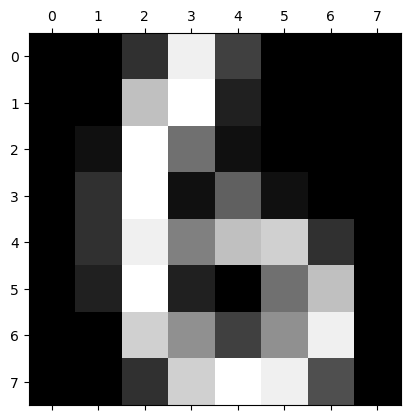

Clase de la imagen: 6


In [139]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digitos.images[234]) 
plt.show() 
print("Clase de la imagen: {}".format(digitos.target[234]))

Este conjunto de datos se puede usar de dos formas:

* Aprender un clasificador multiclase
* Observando la matriz de confusión del clasificador multiclase, elegir un par de dígitos que puedan tener algunas predicciones intercambiadas y aprender un clasificador binario para ese problema (el de distinguir entre esos dos dígitos).

Con los modelos finalmente aprendidos, mostrar con las imágenes del dígito, algún ejemplo que se clasifique bien y alguno que se clasifique mal. 

### 1.1. Exploracion inicial de los datos y  preprocesado de datos
Sabemos que nuestro conjunto de datos se basa en matrices de pixeles de 8x8 por tanto para normalizarlo debemos de dividir por 16. Así obtendremos valores entre 0 a 1. 
Imprimimos por pantalla el tamaño del array para saber el numero de ejemplo. Como tenemos 1797 ejemplos.

In [140]:
X=digitos.data/16.0
y=digitos.target
print(y.shape)

(1797,)


### 1.2.Visualización de algunas características
Veremos cuantos ejemplos tenemos de cada dígito de manera visual. Para ello haremos uso de un histograma con la librería matplotlib:
* Crearemos una figura con 10 axis (2 filas y 5 columnas)
* Con el método flatten() aplanamos la matriz de ejes axs en un array unidimensional, para poder recorrer todos los subplots de la figura usando un único índice con la función enumerate().
* Utilizamos la función .hist() creamos un histograma para cada dígito. Esto función toma como argumento un array de datos, que será aquellos valores de X cuyo valor sea igual al del dígito del histograma
* La funcion ravel() la utilizamos para transformar los datos de cada dígito en una forma que pueda ser procesada por la función .hist()
* Cada histograma representa un dígito diferente, y la altura de cada barra en el histograma indica la frecuencia de los valores de los píxeles del array para ese dígito

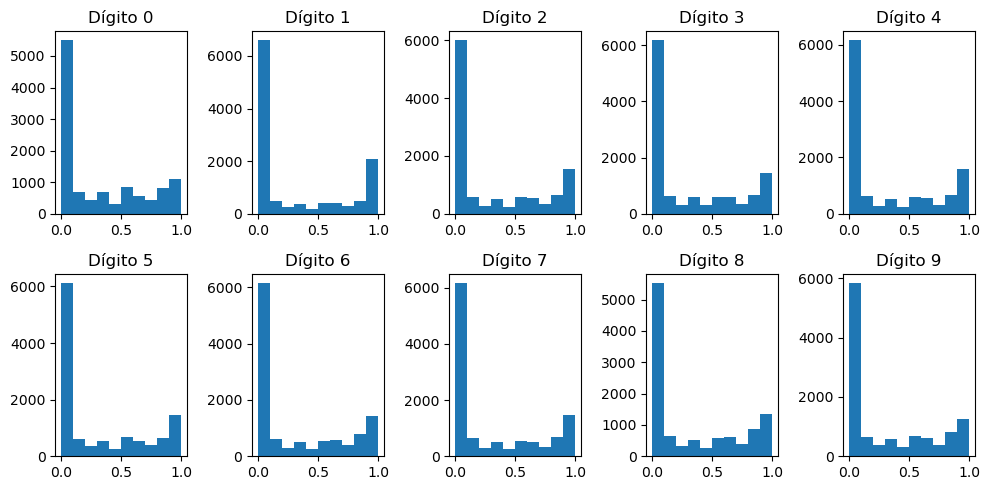

In [141]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
axs = axs.flatten()

for i, ax in enumerate(axs.flatten()):
    ax.hist(X[y == i].ravel())
    ax.set_title(f"Dígito {i}")

plt.tight_layout()
plt.show()

Como vemos estamos ante un conjunto de datos relativamente homogéneo puesto que casi todos los histogramas son  practicamente iguales y oscilan en los mismos valores.

### 1.3.Uso del clasificador y separación para el test
A continuación pasamos a la separación de nuestro conjunto de datos uno de entrenamiento y otro de test, además tambien haremos el entrenamiento de nuestro modelo inicial.
 * Utilizamos .train_test_split() para dividir el conjunto en uno de entrenamiento y otro test
 * Inicializamos nuestro modelo RandomForest con 100 arboles y no especificamos ningún parámetro más
 * Hacemos un *fit* con los datos del conjunto de entrenamiento en nuestro modelo

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = RandomForestClassifier(n_estimators=100, random_state=42)

modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 1.4. Métricas iniciales
Vamos a sacar las métricas iniciales de este primer modelo.Para ello aplicamos .score() en cada conjunto de datos: test y entrenamiento 

In [143]:
print("\nScore train: ");print(modelo.score(X_train,y_train))
print("\nScore test: ");print(modelo.score(X_test,y_test))


Score train: 
1.0

Score test: 
0.9722222222222222


### 1.5. Ajuste de parámetros y validación cruzada
Mirar punto "0.-Explicaciones generales a usar en ambos modelos" ahí se explica lo necesario sobre cada parámetro del Random Forest y GridSearch
Tras la seleccion de parametros pasamos al ajuste de los mismos haciendo GridSearch:
* Creamos un diccionario de parámetros que contiene los valores que deseamos probar para cada parámetro de Random Forest
* Utilizamos GridSearchCV para ajustar los parámetros del modelo con los datos de entrenamiento. 
* Especificamos cv=3 para utilizar una validación cruzada de tres pliegues y evaluar el rendimiento del modelo con diferentes combinaciones de parámetros. Lo recomendable es que sea de mínimo 5 pero para reducir el tiempo le especificamos solo 3.
* El parámetro n_jobs indica la paralización de los núcleos. Si ponemos -1 indicamos que use todos los nucleos de la CPU disponibles. Así reducimos también el tiempo de ejecución.
* Obtenemos el modelo con los mejores parámetros utilizando .best_estimator_

In [144]:
from sklearn.model_selection import GridSearchCV

parametros_digitos = {
    'n_estimators': [100],
    'max_depth': [10, 25],
    'min_samples_split': [2, 7],
    'min_samples_leaf': [1, 3],
    'max_features': ['sqrt', 'log2'],
    'max_samples': [0.5, 0.8],
    'max_leaf_nodes': [None, 5, 10]
}


modelo_digitos = RandomForestClassifier()
busqueda_digitos = GridSearchCV(modelo_digitos, parametros_digitos, cv=5,n_jobs=-1)
busqueda_digitos.fit(X_train, y_train)

mejor_modelo_digitos = busqueda_digitos.best_estimator_

### 1.6. Predecimos en el conjunto y mostramos los resultados
Sacamos el score con el modelo que hemos calculado antes usando GridSearch y pasamos a hacer una función que nos muestre por pantalla un ejemplo bien predecido o mal predecido:
* Le pasamos como parámetro un booleano que indicará si buscamos un ejemplo bien predecido (True) o mal predecido (False)
* Calculamos las predicciones que hace el modelo con el conjunto test
* Si el booleano es True, cogemos el índice de aquel ejemplo cuya predicción sea igual al valor real dado en el conjunto de datos. Usamos random.choice para que sea de manera aleatoria. Si fuese False buscaríamos el índice de aquel ejemplo cuyo valor no sea igual al dado por el conjunto de datos
* Cogemos la imagen en el conjunto de datos haciendo uso del índice antes calculado. Le aplicamos un .reshape() puesto que al principio normalizamos los datos del conjunto y para mostrarlos en pantalla hay que devolverlos a su estado original.
* Nos quedamos también con el valor real dado por el conjunto de datos haciendo uso del índice.
* Calculamos la prediccion que haría nuestro modelo sobre ese mismo ejemplo
* Hacemos un plot de la imagen, sacando por pantalla el valor real y el predecido por el modelo para poder compararlos

Score train: 
1.0

Score test: 
0.975


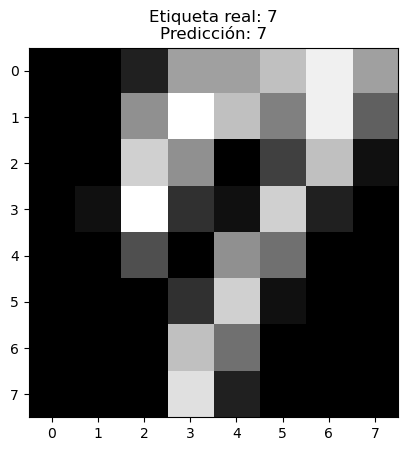

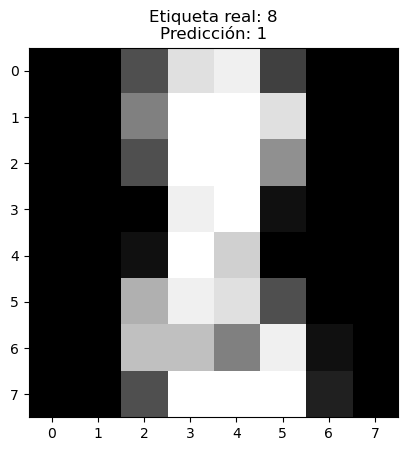

In [145]:
print("Score train: ");print(mejor_modelo_digitos.score(X_train,y_train))
print("\nScore test: ");print(mejor_modelo_digitos.score(X_test,y_test))

y_prediccion_test = mejor_modelo_digitos.predict(X_test)

def muestra_ejemplo(correct=True):
    y_predicciones = mejor_modelo_digitos.predict(X_test)

    if correct:
        ind = np.random.choice(np.where(y_predicciones == y_test)[0])
    else:
        ind = np.random.choice(np.where(y_predicciones != y_test)[0])

    img = X_test[ind].reshape(8, 8)
    y_img = y_test[ind]

    prediction = mejor_modelo_digitos.predict(img.reshape(1, -1))[0]

    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.set_title(f'Etiqueta real: {y_img}\nPredicción: {prediction}')
    plt.show()

muestra_ejemplo(correct=True)
muestra_ejemplo(correct=False)

Al final tras el ajuste de parametros hemos obtenido un 97% de precisión sobre el conjunto de test.

## 2. Críticas de cine en IMDB

En este apartado, los datos serán críticas de películas en la web IMDB (Internet Movie Database). Aunque ya se ha usado en una práctica de clase, lo describimos ahora brevemente. 

Son críticas que ya vienen con la etiqueta "pos" o "neg", de acuerdo a la puntuación que acompaña a la crítica (positiva, 7 o más; negativa 4 o menos). El objetivo es ser capaz de declarar como positiva o negativa una crítica (por supuesto, sin saber la puntuación que la acompaña).

Los datos están disponibles en http://ai.stanford.edu/~amaas/data/sentiment/

**Importante: Una vez descomprimido, eliminar la carpeta `train/unsup`, que no usaremos.**

**Consejo**: puesto que se crean múltiples archivos, se aconseja descomprimirlo en una carpeta que no se sincronice con la nube.  

Para cargarlo en sklearn usar la utilidad `load_files`:  

In [146]:
from sklearn.datasets import load_files

reviews_train = load_files("aclImdb/train/",encoding='utf-8')
text_train, y_train = reviews_train.data, reviews_train.target

reviews_test = load_files("aclImdb/test/",encoding='utf-8')
text_test, y_test = reviews_test.data, reviews_test.target

Quitamos algunas marcas en HTML, para "limpiar" los textos.

In [147]:
text_train = [doc.replace("<br />", " ") for doc in text_train]
text_test = [doc.replace("<br />", " ") for doc in text_test]

Para poder aplicar los clasificadores de Scikit Learn, hemos de vectorizar los textos. En scikitlearn se pueden elegir varias formas de vectorizar:

* **CountVectorizer**, modo binario (sólo se anota si un término ocurre o no)
* **CountVectorizer**, contando ocurrencias
* **TfIdfVectorizer**, vectorizando con TfIdf

El uso de estos vectorizadores se puede comprender a partir de lo visto en el tema de Procesamiento de Lenguaje Natural, y del manual de Scikit Learn. En particular **es importante el uso de los parámetros stop_words y min_df** para simplificar a vectorización. Una vez entendido y explorado su uso, elegir la mejor combinación de vectorizador y de clasificador, para este conjunto de datos. 

También mostrar la predicción que se realiza sobre algunas críticas concretas del conjunto de test. 

### 1.1. Exploración preliminar del conjunto de datos 
Primero exploremos un poco los datos y analicemos de manera preliminar al procesado de los mismos. Imprimimos cuantos ejemplos hay para el conjunto de entrenamiento y test de cada clase

In [148]:
print("Tamaño de los datos en train:",len(text_train))
print("Tamaño de los datos en test:",len(text_test))

for clase in set(y_train):
    print("\n")
    
    if(clase==0):
        tipo="positiva"
    else:
        tipo="negativa"
    
    print("Tenemos", sum(1 for elem in y_train==clase if elem==True), "de la clase", tipo, "en train")
    print("Tenemos", sum(1 for elem in y_test==clase if elem==True), "de la clase", tipo, "en test")


Tamaño de los datos en train: 24974
Tamaño de los datos en test: 25000


Tenemos 12474 de la clase positiva en train
Tenemos 12500 de la clase positiva en test


Tenemos 12500 de la clase negativa en train
Tenemos 12500 de la clase negativa en test


Como vemos estamos ante unos datos bastante homógeneos. 
### 1.2. Visualización de alguna característica
Pasemos a visualizar los datos anteriormente extraídos en algunas gráficas. Veremos si la longitud de las críticas afecta al valor asociado a dicha crítica, es decir, si la critica fue positiva y negativa.
Calculamos el conjunto de datos de aquellas críticas que fueron positivas (valor asociado 1) y el conjunto de las críticas negativas (valor asociado 0). Tras esto hacemos uso de un histograma para mostrar en el eje de las *x* la longitud de la crítica y en el eje de la *y* el número de críticas (positivas y negativas) con dicha longitud. 

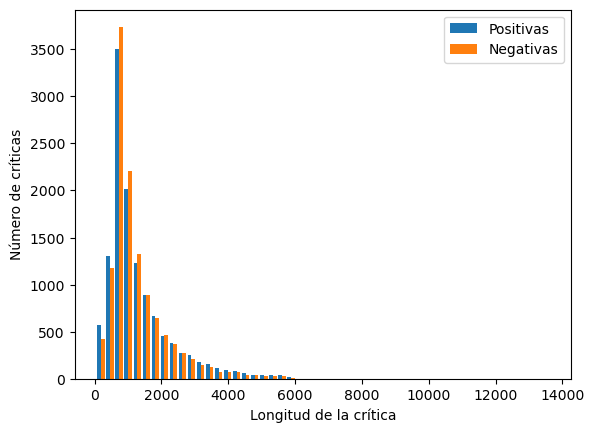

In [149]:
import matplotlib.pyplot as plt

longitudes_positivas = [len(text) for i, text in enumerate(text_train) if y_train[i] == 1]
longitudes_negativas = [len(text) for i, text in enumerate(text_train) if y_train[i] == 0]

plt.hist([longitudes_positivas, longitudes_negativas], bins=50, label=['Positivas', 'Negativas'])

plt.xlabel('Longitud de la crítica')
plt.ylabel('Número de críticas')

plt.axis('tight')
plt.legend()

plt.show()

Tras la visualización llegamos a la conclusión de que la longitud de los datos no influye mucho en la clase que pertenece. Otra vez estamos ante unos datos bastante homogéneos.
### 1.3. Uso de clasificadores 
Ahora haremos uso de clasificadores en nuestro caso hemos decidido escoger el Random Forest. Para utilizarlo hemos de seguir los siguientes pasos:
* Primero tenemos que vectorizarlo. Hacemos uso de TfidfVectorizer que es una función de feature_extraction.text para facilitarnos está tarea. 
* Es muy importante a la hora de hacer el vectorizador añadir el parametro stop_words que nos elimina aquellas palabras innecesarias en el corpus y tambien min_df=400 que elimina aquellas palabras que aparecen en menos de 400 documentos
* Le hemos añadido ese valor de max_features puesto que si no le fijamos el máximo de características a ese valor nos lanzará un error al vectorizar los datos del conjunto test
* Inicializamos nuestro modelo y le hacemos *fit* con los datos de entrenamiento
* Hacemos una predicción inicial 
* Sacamos por pantalla la precisión del modelo 

In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

vectorizador = TfidfVectorizer(max_features= 968, stop_words='english', min_df=400)
caracteristicas = vectorizador.fit_transform(text_train)

modelo = RandomForestClassifier(n_estimators=100, random_state=42).fit(caracteristicas, y_train)

caracteristicas_test= vectorizador.fit_transform(text_test)

print("\nScore test: ");print(modelo.score(caracteristicas_test,y_test))


Score test: 
0.67896


La precisión del módelo obtenido anteriormente ha sido de un 67%. 

### 1.4. Ajuste de parámetros
Mirar punto "0.-Explicaciones generales a usar en ambos modelos" ahí se explica lo necesario sobre cada parámetro en las funciones RandomForest y GridSearch
Tras la selección de parámetros pasamos al ajuste de los mismos haciendo GridSearch:
* Creamos un diccionario de parámetros que contiene los valores que deseamos probar para cada parámetro en Random Forest
* Utilizamos GridSearchCV para ajustar los parámetros del modelo con los datos de entrenamiento. 
* Especificamos cv=3 para utilizar una validación cruzada de tres pliegues y evaluamos el rendimiento del modelo con las diferentes combinaciones de parámetros. Lo recomendable es que la validación sea de minimo 5 pliegues pero para reducir el tiempo lo especificamos de 3
* El parámetro n_jobs indica la paralización de los núcleos. Si ponemos -1 indicamos que use todos los núcleos de la CPU disponibles. Así reducimos también el tiempo de ejecución.
* Obtenemos el modelo con los mejores parámetros utilizando .best_estimator_

In [151]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

caracteristicas = vectorizador.fit_transform(text_train)

parametros = {
    'n_estimators': [100, 200],
    'max_depth': [10, 25],
    'min_samples_split': [2, 7],
    'min_samples_leaf': [1, 3],
    'max_features': ['sqrt', 'log2'],
    'max_samples': [0.5, 0.8],
    'max_leaf_nodes': [None, 5, 10]
}

modelo = RandomForestClassifier()
busqueda = GridSearchCV(modelo, parametros, cv=3,n_jobs=-1)
busqueda.fit(caracteristicas, y_train)

mejor_modelo = busqueda.best_estimator_

### 1.5. Predicción y muestra de métricas
Tras haber encontrado el mejor modelo que se ajusta a esos parámetros con la validación cruzada y el GridSearch. Pasamos a sacar por pantalla el rendimiento antes ambos conjuntos.

In [152]:
caracteristicas_test= vectorizador.fit_transform(text_test)

print("Score train: ");print(mejor_modelo.score(caracteristicas,y_train))
print("\nScore test: ");print(mejor_modelo.score(caracteristicas_test,y_test))

Score train: 
0.8982541843517258

Score test: 
0.69116


Al final hemos obtenido una precisión de 70% tras haber hecho la búsqueda y ajuste de parámetros.

## 3. Un tercer conjunto de datos adicional

Este apartado es opcional, y se podría hacer en lugar de uno de los dos apartados anteriores

Se pide estudiar un tercer conjunto de datos (clasificación o regresión), obtenido a partir de algún repositorio. Por ejemplo, uno muy popular es el de UCI: https://archive.ics.uci.edu/ml/index.php

Damos un par de sugerencias, pero solo a título orientativo:

* Conjunto de datos de dermatología: https://archive.ics.uci.edu/ml/datasets/dermatology (problema de clasificación)
* Calidad de vino: https://archive.ics.uci.edu/ml/datasets/wine+quality (regresión, y por tanto habría que usar las correspondientes versiones de regresión de los modelos) 

Nótese que en este caso, esto implicaría previamente cargar de manera adecuada los datos (posiblemente con algún preprocesado).